In [399]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from attr import dataclass
from scipy.misc import dataset_methods

sns.set_theme()
sns.set_style("whitegrid")

base_path = f"{os.environ["OneDrive"]}/Data Science Project Idea 31"

In [400]:
combined_data = pd.read_csv(f"{base_path}/combined.csv")
combined_data.describe()

,ID,NativeAmerican,Asian,Black,Hispanic,Multiracial,PacificIslander,White,LowIncome,layout_type,Distance_to_freeway,Street_100,Street_200,Street_300m,PercentTree,air_quality
count,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.00000,8420.000000,8420.000000,8420.000000,8420.000000
mean,5.514133,0.012013,0.018153,0.039224,0.127051,0.154201,0.035299,0.612126,0.731945,0.504276,1352.552173,512.33981,1981.381532,4818.788432,59.903361,12.899240
std,2.882118,0.007514,0.012430,0.027318,0.027331,0.028394,0.030033,0.111732,0.179560,0.500011,1087.718972,191.32855,528.145460,867.700213,21.487608,27.843341
min,1.000000,0.000000,0.000000,0.010000,0.090000,0.110000,0.000000,0.440000,0.380000,0.000000,221.500000,348.90000,1347.400000,3550.200000,31.000000,0.000000
25%,3.000000,0.010000,0.010000,0.020000,0.110000,0.130000,0.000000,0.500000,0.620000,0.000000,397.400000,405.90000,1485.100000,4244.000000,38.300000,2.190000
50%,6.000000,0.010000,0.030000,0.040000,0.130000,0.160000,0.050000,0.610000,0.840000,1.000000,976.600000,447.70000,1882.200000,4561.600000,51.500000,5.915000
75%,8.000000,0.020000,0.030000,0.050000,0.160000,0.180000,0.050000,0.720000,0.850000,1.000000,2328.200000,526.20000,2288.500000,5550.400000,84.100000,14.720000
max,10.000000,0.020000,0.030000,0.110000,0.170000,0.190000,0.080000,0.790000,0.910000,1.000000,3664.600000,1012.70000,3006.000000,6682.000000,89.100000,564.130000


In [401]:
combined_data.isna().sum()

ID                     0
NativeAmerican         0
Asian                  0
Black                  0
Hispanic               0
Multiracial            0
PacificIslander        0
White                  0
LowIncome              0
layout_type            0
Distance_to_freeway    0
Street_100             0
Street_200             0
Street_300m            0
PercentTree            0
Time..UTC.00.00.       0
air_quality            0
dtype: int64

In [402]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8420 entries, 0 to 8419
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8420 non-null   int64  
 1   NativeAmerican       8420 non-null   float64
 2   Asian                8420 non-null   float64
 3   Black                8420 non-null   float64
 4   Hispanic             8420 non-null   float64
 5   Multiracial          8420 non-null   float64
 6   PacificIslander      8420 non-null   float64
 7   White                8420 non-null   float64
 8   LowIncome            8420 non-null   float64
 9   layout_type          8420 non-null   int64  
 10  Distance_to_freeway  8420 non-null   float64
 11  Street_100           8420 non-null   float64
 12  Street_200           8420 non-null   float64
 13  Street_300m          8420 non-null   float64
 14  PercentTree          8420 non-null   float64
 15  Time..UTC.00.00.     8420 non-null   o

In [403]:
combined_data['Time..UTC.00.00.'] = pd.to_datetime(combined_data['Time..UTC.00.00.'])

### Air Quality Numerical Analysis

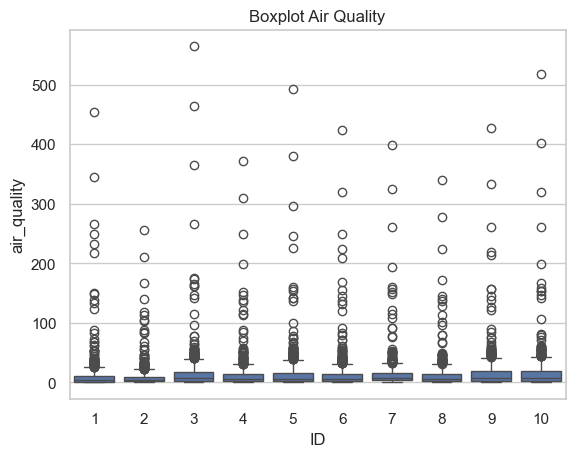

In [404]:
sns.boxplot(data=combined_data, x='ID', y='air_quality')
plt.title('Boxplot Air Quality')
plt.show()

#### Time Series Trend with Outliers and without Outliers (Z score method and IQR)

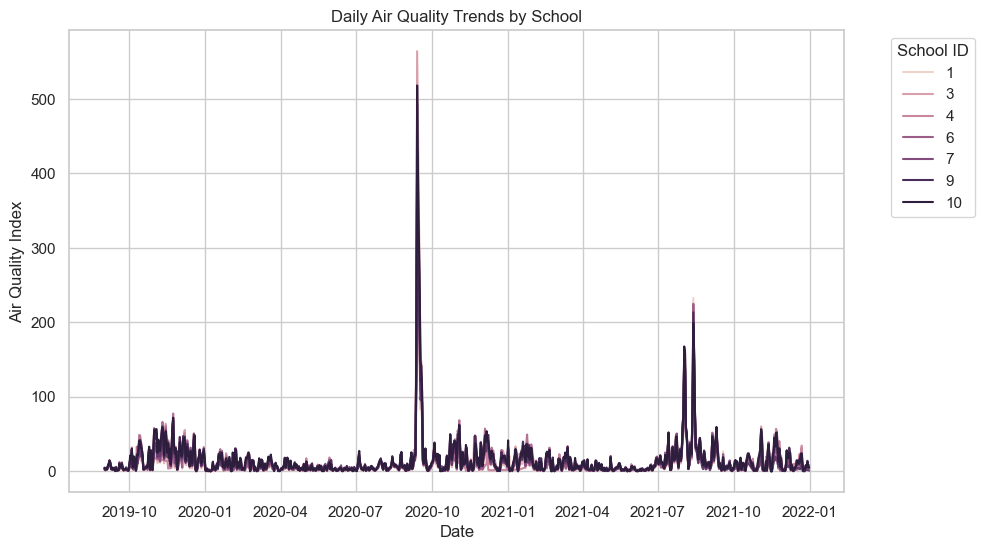

In [405]:
# Air quality trend by school before removing outliers
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='Time..UTC.00.00.', y='air_quality', hue='ID')
plt.title('Daily Air Quality Trends by School')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

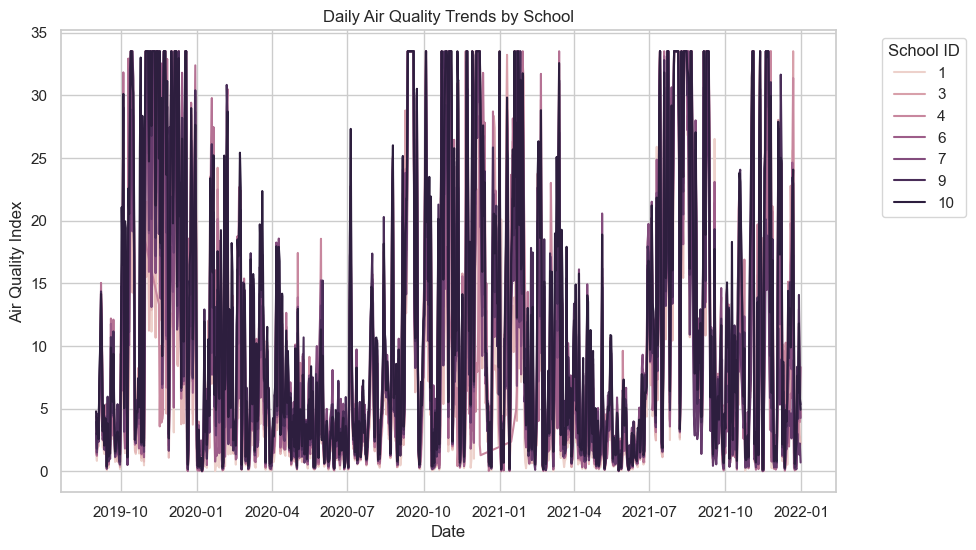

In [406]:
# Removing outliers using IQR
combined_data_iqr = combined_data.copy()
Q1 = combined_data_iqr['air_quality'].quantile(0.25)
Q3 = combined_data_iqr['air_quality'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
combined_data_iqr['air_quality'] = combined_data_iqr['air_quality'].clip(lower=lower_bound, upper=upper_bound)

# Air quality trend by school after removing outliers with IQR
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data_iqr, x='Time..UTC.00.00.', y='air_quality', hue='ID')
plt.title('Daily Air Quality Trends by School')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


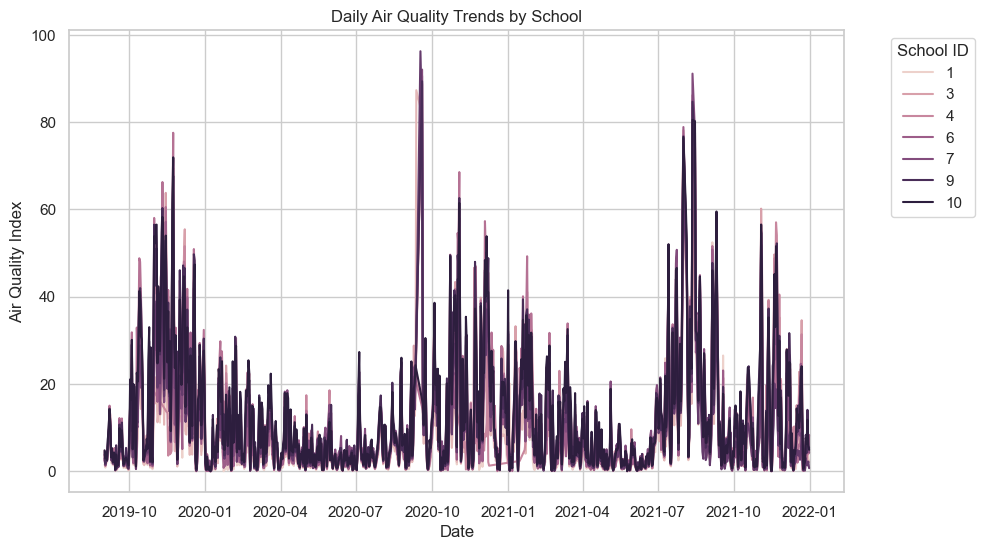

In [407]:
# Remove outliers assuming all air quality values outside 3 standard deviations from mean are outliers
from scipy import stats
combined_data_z = combined_data.copy()

combined_data_z = combined_data_z[np.abs(stats.zscore(combined_data_z["air_quality"])) < 3]

# Air quality trend by school after removing outliers with Z score
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data_z, x='Time..UTC.00.00.', y='air_quality', hue='ID')
plt.title('Daily Air Quality Trends by School')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [408]:
dataset = combined_data
dataset.head()

,ID,NativeAmerican,Asian,Black,Hispanic,Multiracial,PacificIslander,White,LowIncome,layout_type,Distance_to_freeway,Street_100,Street_200,Street_300m,PercentTree,Time..UTC.00.00.,air_quality
0,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-01 00:00:00+00:00,1.55
1,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-02 00:00:00+00:00,0.83
2,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-03 00:00:00+00:00,2.50
3,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-04 00:00:00+00:00,1.98
4,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-05 00:00:00+00:00,4.33


#### Air Quality vs Geography

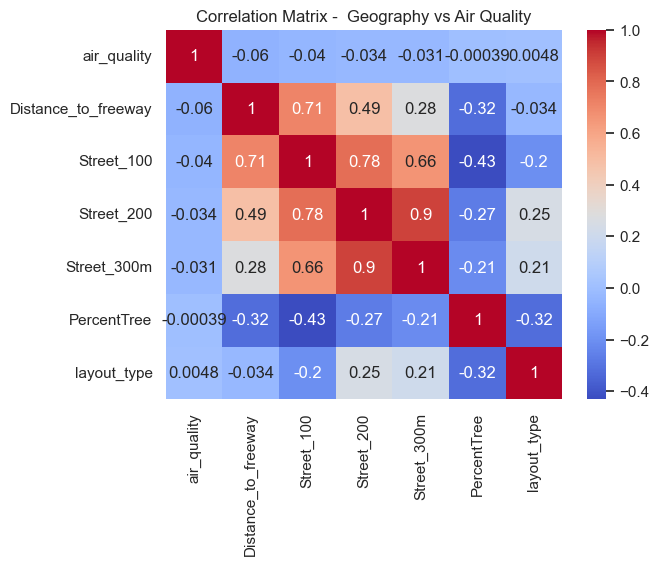

In [409]:
geography_columns = ["air_quality", "Distance_to_freeway", "Street_100", "Street_200", "Street_300m", "PercentTree","layout_type"]

# correlation
geography_corr = dataset[geography_columns].corr()
sns.heatmap(geography_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix -  Geography vs Air Quality')
plt.show()


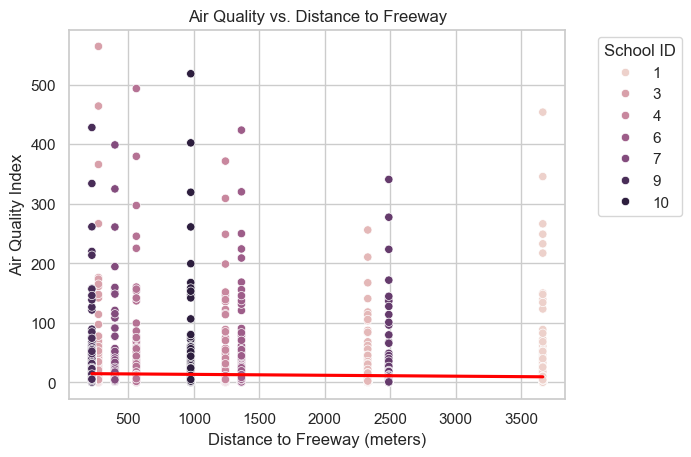

In [410]:
# Distance to freeway vs Air Quality
sns.scatterplot(data=dataset, x='Distance_to_freeway', y='air_quality', hue='ID')
sns.regplot(data=dataset, x='Distance_to_freeway', y='air_quality', scatter=False, color='red')
plt.title('Air Quality vs. Distance to Freeway')
plt.xlabel('Distance to Freeway (meters)')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

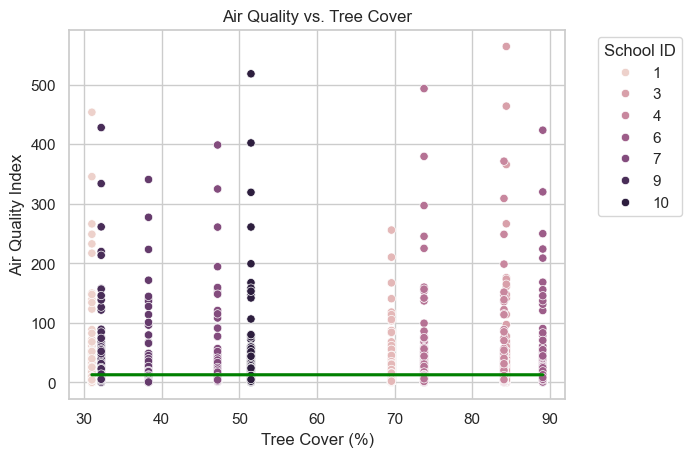

In [411]:
# Air quality vs Tree cover
sns.scatterplot(data=dataset, x='PercentTree', y='air_quality', hue='ID')
sns.regplot(data=dataset, x='PercentTree', y='air_quality', scatter=False, color='green')
plt.title('Air Quality vs. Tree Cover')
plt.xlabel('Tree Cover (%)')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

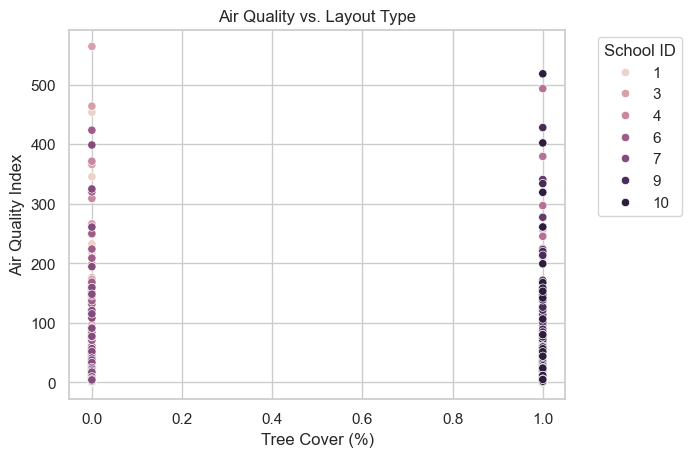

In [412]:
sns.scatterplot(data=dataset, x='layout_type', y='air_quality', hue='ID')
# sns.regplot(data=combined_data_z, x='PercentTree', y='air_quality', scatter=False, color='green')
plt.title('Air Quality vs. Layout Type')
plt.xlabel('Tree Cover (%)')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Air Quality vs Demographics

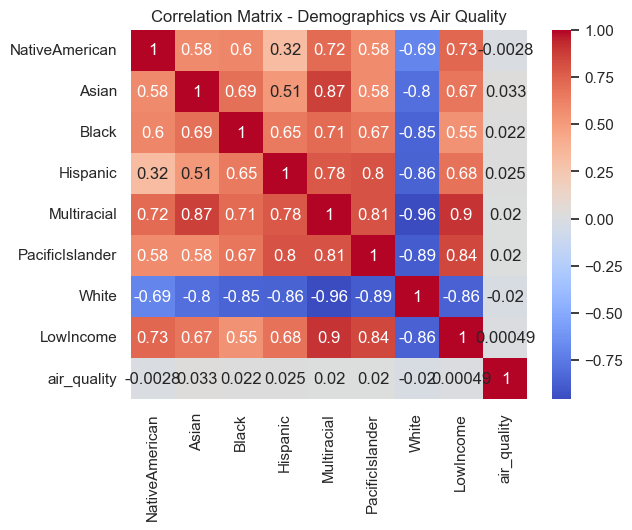

In [413]:

demographic_columns = ["NativeAmerican","Asian","Black","Hispanic","Multiracial","PacificIslander","White","LowIncome", "air_quality"]

# correlation
demographic_corr = dataset[demographic_columns].corr()
sns.heatmap(demographic_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Demographics vs Air Quality')
plt.show()


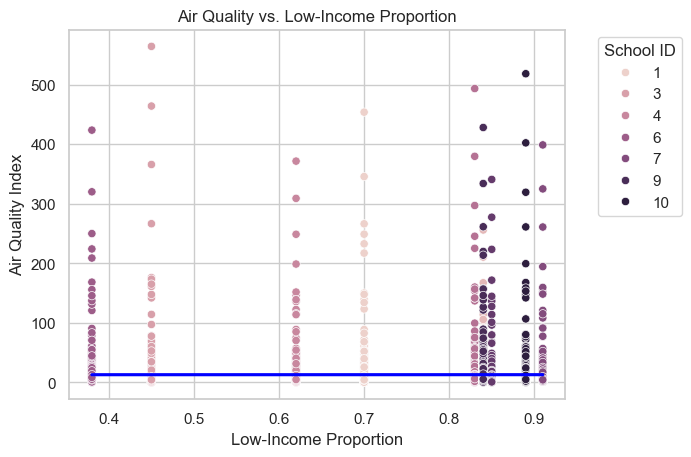

In [414]:
sns.scatterplot(data=dataset, x='LowIncome', y='air_quality', hue='ID')
sns.regplot(data=dataset, x='LowIncome', y='air_quality', scatter=False, color='blue')
plt.title('Air Quality vs. Low-Income Proportion')
plt.xlabel('Low-Income Proportion')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [415]:
# sns.pairplot(combined_data_z, vars=['NativeAmerican', 'Asian', 'Black', 'Hispanic', 'White', 'air_quality'], hue='ID')
# plt.suptitle('Relationships Between Demographics and Air Quality', y=1.02)
# plt.show()

#### Temporal Analysis - Monthly

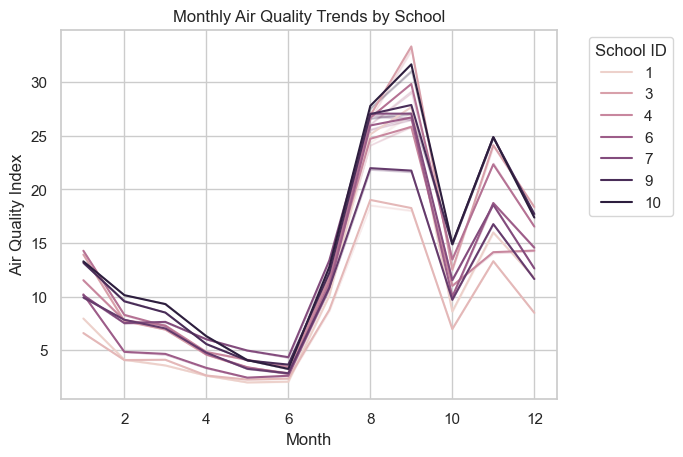

In [416]:
dataset['month'] = dataset['Time..UTC.00.00.'].dt.month
sns.lineplot(data=dataset, x='month', y='air_quality', hue='ID', errorbar=("ci", 0.99))
plt.title('Monthly Air Quality Trends by School')
plt.xlabel('Month')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

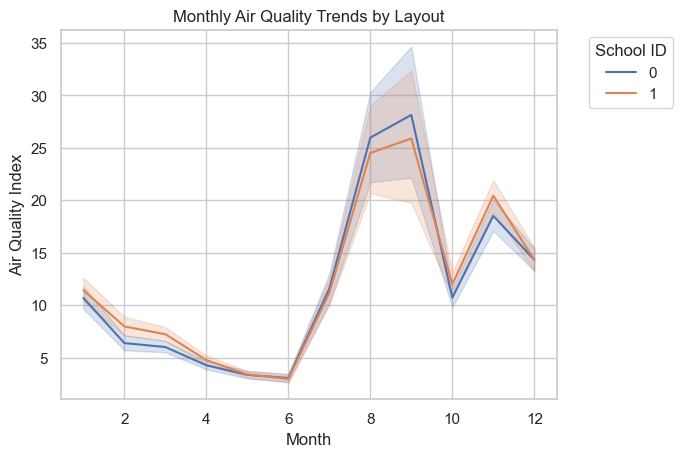

In [417]:
dataset['month'] = dataset['Time..UTC.00.00.'].dt.month
sns.lineplot(data=dataset, x='month', y='air_quality', hue='layout_type')
plt.title('Monthly Air Quality Trends by Layout')
plt.xlabel('Month')
plt.ylabel('Air Quality Index')
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Air Quality Categorical Analysis

In [418]:
# Categorizing air quality data
def get_air_quality_category(aqi):
        if aqi < 0:
            return 'Invalid'
        elif aqi <= 9:
            return 'Good'
        elif aqi <= 35.4:
            return 'Moderate'
        elif aqi <= 55.4:
            return 'Unhealthy_Sensitive'
        elif aqi <= 125.4:
            return 'Unhealthy'
        elif aqi <= 225.4:
            return 'Very Unhealthy'
        else:
            return 'Hazardous'

dataset['air_quality_category'] = dataset['air_quality'].apply(get_air_quality_category)
dataset.head()

,ID,NativeAmerican,Asian,Black,Hispanic,Multiracial,PacificIslander,White,LowIncome,layout_type,Distance_to_freeway,Street_100,Street_200,Street_300m,PercentTree,Time..UTC.00.00.,air_quality,month,air_quality_category
0,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-01 00:00:00+00:00,1.55,9,Good
1,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-02 00:00:00+00:00,0.83,9,Good
2,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-03 00:00:00+00:00,2.50,9,Good
3,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-04 00:00:00+00:00,1.98,9,Good
4,1,0.02,0.03,0.04,0.09,0.16,0.0,0.64,0.7,0,3664.6,1012.7,2723.7,5550.4,31.0,2019-09-05 00:00:00+00:00,4.33,9,Good


air_quality_category
Good                   5165
Moderate               2734
Unhealthy_Sensitive     327
Unhealthy               103
Very Unhealthy           59
Hazardous                32
Name: count, dtype: int64


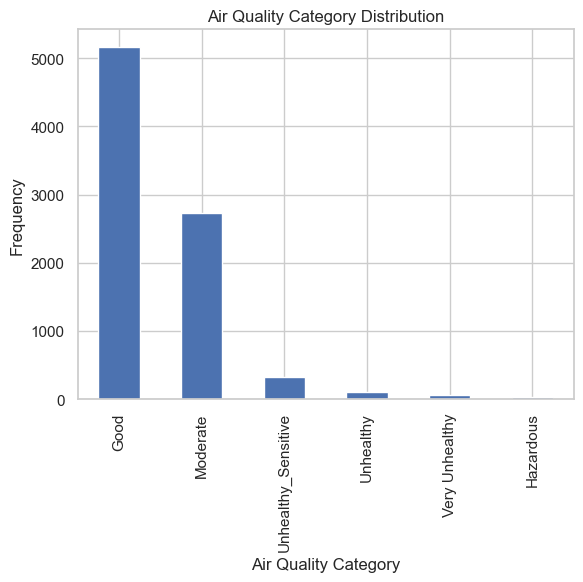

In [419]:
# Frequency counts for air quality categories
category_counts = dataset['air_quality_category'].value_counts()
print(category_counts)

category_counts.plot(kind='bar', title='Air Quality Category Distribution')
plt.xlabel('Air Quality Category')
plt.ylabel('Frequency')
plt.show()

#### Temporal Analysis - Monthly

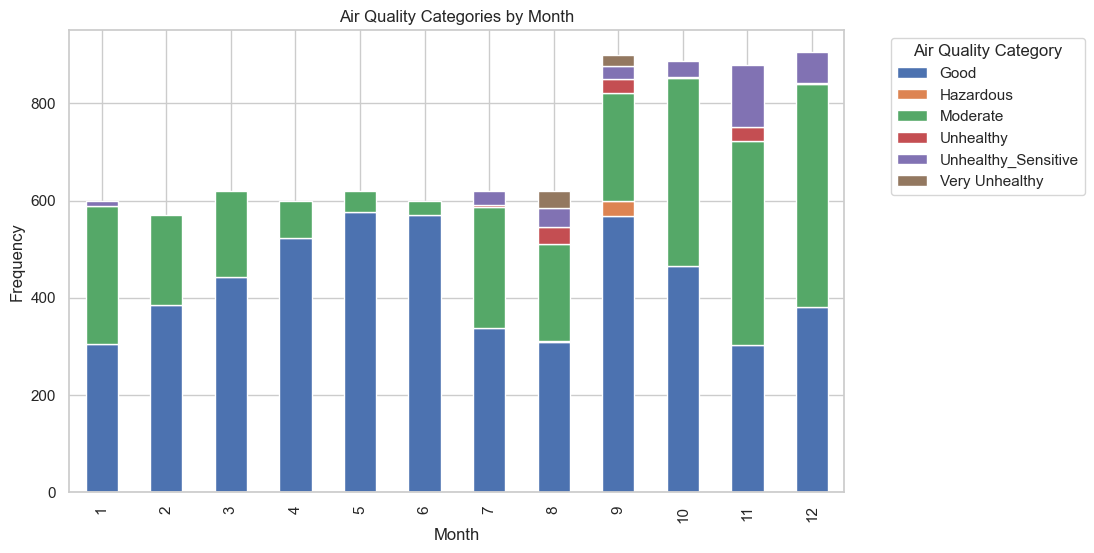

In [420]:
monthly_counts_air_quality_category = dataset.groupby(['month', 'air_quality_category']).size().reset_index(name='count')
pivot_table = monthly_counts_air_quality_category.pivot(index='month', columns='air_quality_category', values='count').fillna(0)

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Air Quality Categories by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Air Quality Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

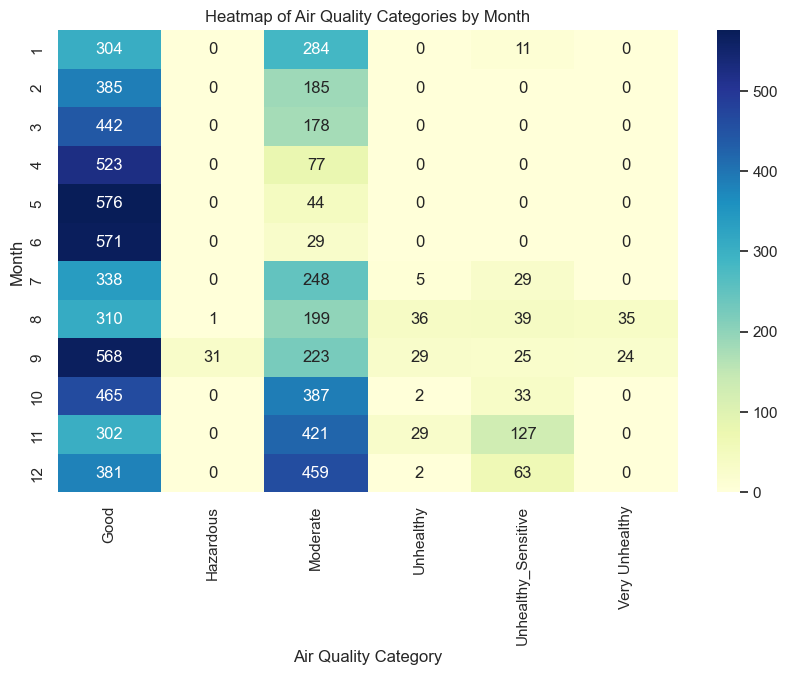

In [421]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap="YlGnBu")
plt.title('Heatmap of Air Quality Categories by Month')
plt.xlabel('Air Quality Category')
plt.ylabel('Month')
plt.show()

#### Geography vs Air Quality Category

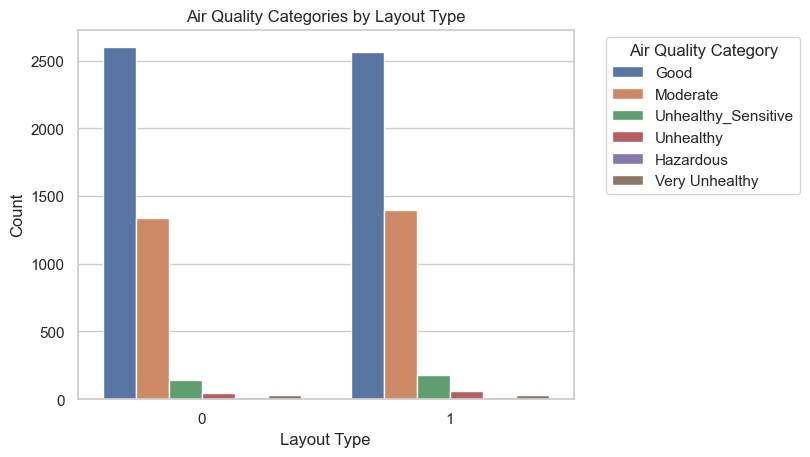

In [422]:
# Air quality category by layout type
sns.countplot(data=dataset, x='layout_type', hue='air_quality_category')
plt.title('Air Quality Categories by Layout Type')
plt.xlabel('Layout Type')
plt.ylabel('Count')
plt.legend(title='Air Quality Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

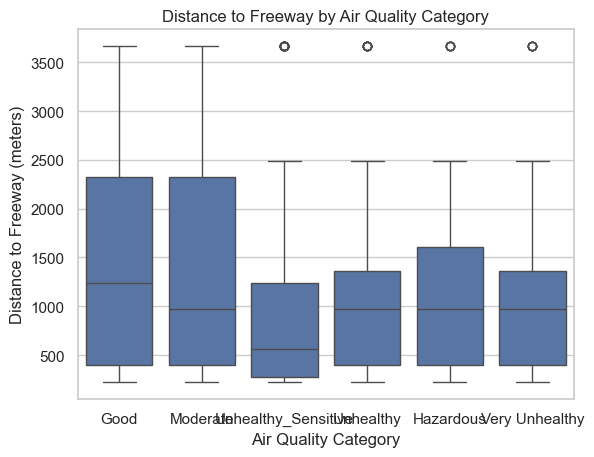

<Figure size 3000x4000 with 0 Axes>

In [431]:
sns.boxplot(data=dataset, x='air_quality_category', y='Distance_to_freeway')
plt.title('Distance to Freeway by Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('Distance to Freeway (meters)')
plt.figure(figsize=(30, 40))
plt.tight_layout()
plt.show()

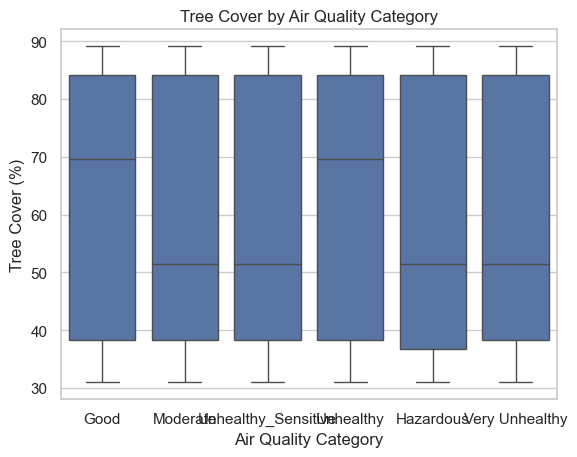

In [424]:
sns.boxplot(data=dataset, x='air_quality_category', y='PercentTree')
plt.title('Tree Cover by Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('Tree Cover (%)')
plt.show()


#### Demographics vs Air Quality

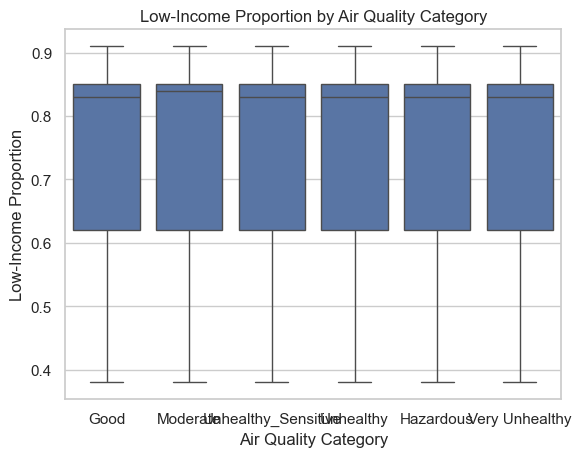

In [425]:
sns.boxplot(data=dataset, x='air_quality_category', y='LowIncome')
plt.title('Low-Income Proportion by Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('Low-Income Proportion')
plt.show()